# Data cleaning
(in colaboration with Joffrey Bienvenu)

#### Ici nous avons un dataset déjà trié par un collègue. Mon but ici est juste de repasser dessus pour qu'il corresponde à mes attentes

In [1]:
# importation des libs/datasets...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/immoCollect52c.csv', index_col=0)
df

,postal_code,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,...,swimming_pool,state_of_the_building,locality,district,province,province_int,region,region_int,district_int,ratio_free_build
4,7912,0,550000,4,325,1,0,1,1,3570.0,...,0,good,Frasnes-lez-Anvaing,Ath,hainaut,6.0,wallonie,1.0,9.0,-1.488515
6,1650,0,525000,4,220,1,1,1,1,1600.0,...,0,good,Beersel,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.851322
9,1332,0,549000,4,210,1,0,1,1,2004.0,...,0,as new,Rixensart,Nivelles,brabant-wallon,8.0,wallonie,1.0,4.0,-3.410265
10,8310,0,519000,3,273,1,1,0,1,591.0,...,0,as new,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
12,8200,0,535000,4,200,1,0,1,1,559.0,...,0,as new,Brugge,Brugge,flandre-occidentale,0.0,flandre,0.0,28.0,-2.429051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59138,3210,0,495000,4,231,0,0,1,0,374.0,...,0,as new,Lubbeek,Leuven,brabant-flamand,5.0,flandre,0.0,2.0,-2.483942
59145,2310,0,468000,3,180,1,0,0,0,0.0,...,0,None,Rijkevorsel,Turnhout,anvers,2.0,flandre,0.0,22.0,-1.905413
59150,1800,0,454993,3,169,0,0,0,0,389.0,...,0,None,Vilvoorde,Hal-Vilvorde,brabant-flamand,5.0,flandre,0.0,8.0,-2.633313
59152,3530,0,475000,3,222,0,0,0,0,1124.0,...,0,None,Houthalen-Helchteren,Maaseik,limbourg,7.0,flandre,0.0,26.0,-2.208714


In [2]:
df.isna().sum()

postal_code                   0
type_of_property              0
price                         0
number_of_rooms               0
house_area                    0
fully_equipped_kitchen        0
open_fire                     0
terrace                       0
garden                        0
surface_of_the_land       23458
number_of_facades             0
swimming_pool                 0
state_of_the_building         0
locality                      0
district                      0
province                      0
province_int                  0
region                        0
region_int                    0
district_int                  0
ratio_free_build              0
dtype: int64

In [3]:
# 17k na from surface_of_the_land, i drop the collumn
df.drop(columns=['surface_of_the_land'],inplace=True)
# df.isna().sum()
df.shape

(44372, 20)

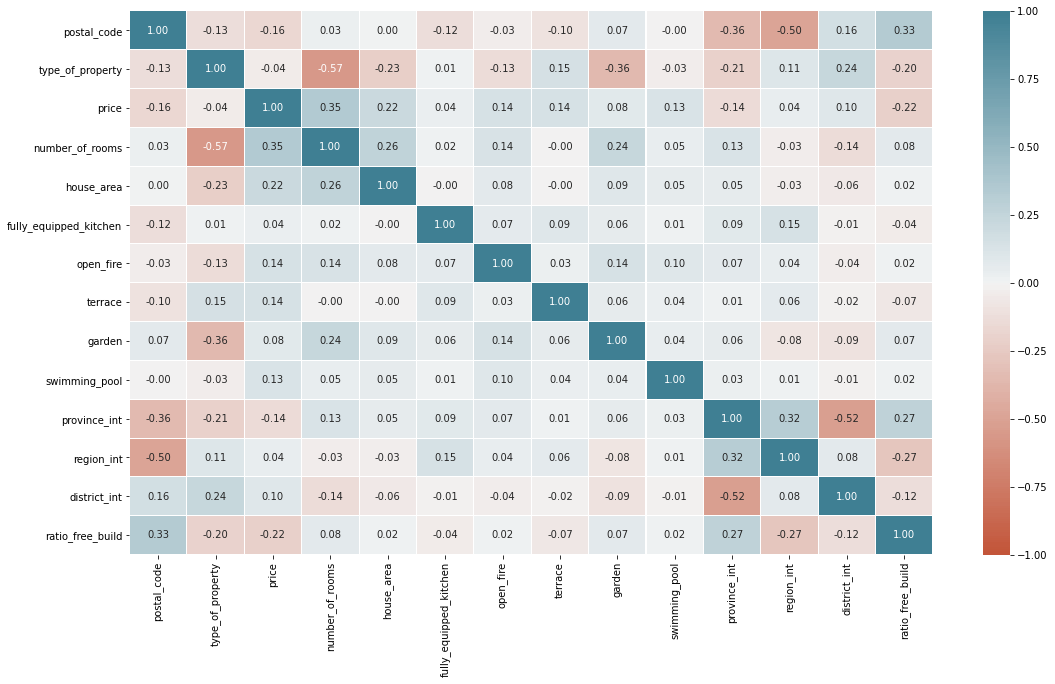

In [4]:
# Print the heatmap
plt.subplots(figsize=(18, 10))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [5]:
df.dtypes

postal_code                 int64
type_of_property            int64
price                       int64
number_of_rooms             int64
house_area                  int64
fully_equipped_kitchen      int64
open_fire                   int64
terrace                     int64
garden                      int64
number_of_facades          object
swimming_pool               int64
state_of_the_building      object
locality                   object
district                   object
province                   object
province_int              float64
region                     object
region_int                float64
district_int              float64
ratio_free_build          float64
dtype: object

#### Let's cleaning this for my model prediction !

In [6]:
for columnName in df.keys():
    print(df[columnName].value_counts())

1180    1004
1000     892
8300     752
3700     700
8400     687
        ... 
5334       1
8904       1
6663       1
6833       1
3293       1
Name: postal_code, Length: 1041, dtype: int64
1    23458
0    20914
Name: type_of_property, dtype: int64
199000    647
249000    609
299000    601
225000    593
295000    586
         ... 
288860      1
276566      1
206900      1
280600      1
180200      1
Name: price, Length: 3472, dtype: int64
2    16717
3    15609
4     6783
1     5263
Name: number_of_rooms, dtype: int64
90     1105
100    1094
120    1036
150     940
80      891
       ... 
590       1
686       1
750       1
655       1
399       1
Name: house_area, Length: 547, dtype: int64
1    31046
0    13326
Name: fully_equipped_kitchen, dtype: int64
0    42383
1     1989
Name: open_fire, dtype: int64
1    27659
0    16713
Name: terrace, dtype: int64
0    31246
1    13126
Name: garden, dtype: int64
2       16500
None    11902
3        7965
4        7527
1         478
Name: number_of_

In [7]:
# suppression des collonnes inutiles/ contenant trop de valeurs manquantes
df.drop(columns=['open_fire'],inplace=True)
df.drop(columns=['number_of_facades'],inplace=True)
df.drop(columns=['swimming_pool'],inplace=True)
# df.drop(columns=['state_of_the_building'],inplace=True)


(44372, 17)

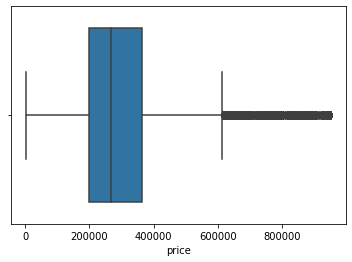

In [8]:
sns.boxplot(x=df['price'])
df.shape

(42243, 17)

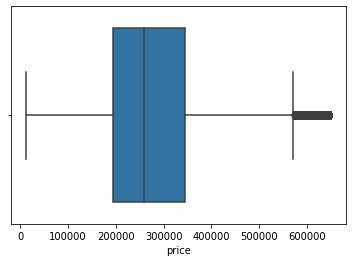

In [9]:
df = df[(df['price'] < 650000) & (df['price'] > 10000)]
sns.boxplot(x=df['price'])
df.shape

In [10]:
df['number_of_rooms'].value_counts()

2    16331
3    14654
4     6020
1     5238
Name: number_of_rooms, dtype: int64

<AxesSubplot:xlabel='house_area'>

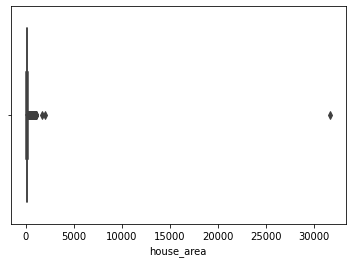

In [11]:
sns.boxplot(x=df['house_area'])

<AxesSubplot:xlabel='house_area'>

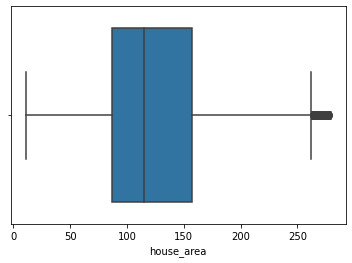

In [12]:
df = df[(df['house_area'] < 280) & (df['house_area'] > 10)]
sns.boxplot(x=df['house_area'])

In [13]:
print(df['state_of_the_building'].value_counts())
print(df.shape)
df = df[df['state_of_the_building'] != "to restore"]
print(df.shape)

def is_new(element):
    if element == "as new":
        element = 1
        return element
    else: 
        element = 0
        return element
    

as new            12531
good              10800
None              10186
to be done up      2734
to renovate        2323
just renovated     2217
to restore          122
Name: state_of_the_building, dtype: int64
(40913, 17)
(40791, 17)


In [14]:
df['state_of_the_building'] = df['state_of_the_building'].apply(is_new)
df['state_of_the_building'].value_counts()

0    28260
1    12531
Name: state_of_the_building, dtype: int64

In [15]:
df = df.rename(columns = {'number_of_rooms': 'number_of_bedroom'}, inplace = False)
df = df.rename(columns = {'state_of_the_building': 'is_new'}, inplace = False)

## Un peu de visualisation

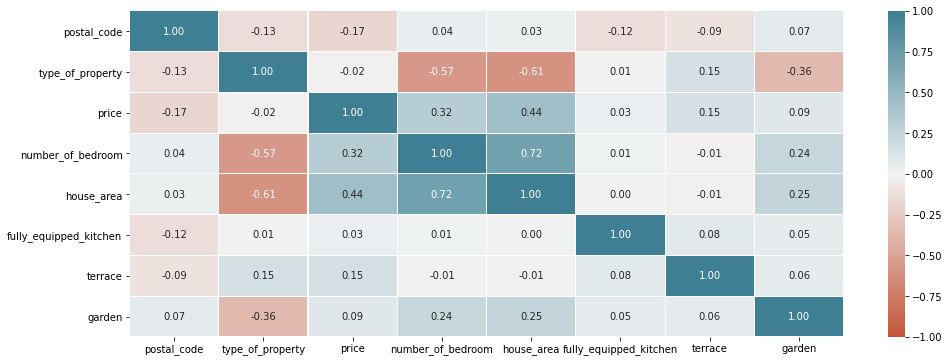

In [16]:
df_util = df.iloc[:,0:8]

# Print the heatmap
plt.subplots(figsize=(16, 6))   
sns.heatmap(df_util.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

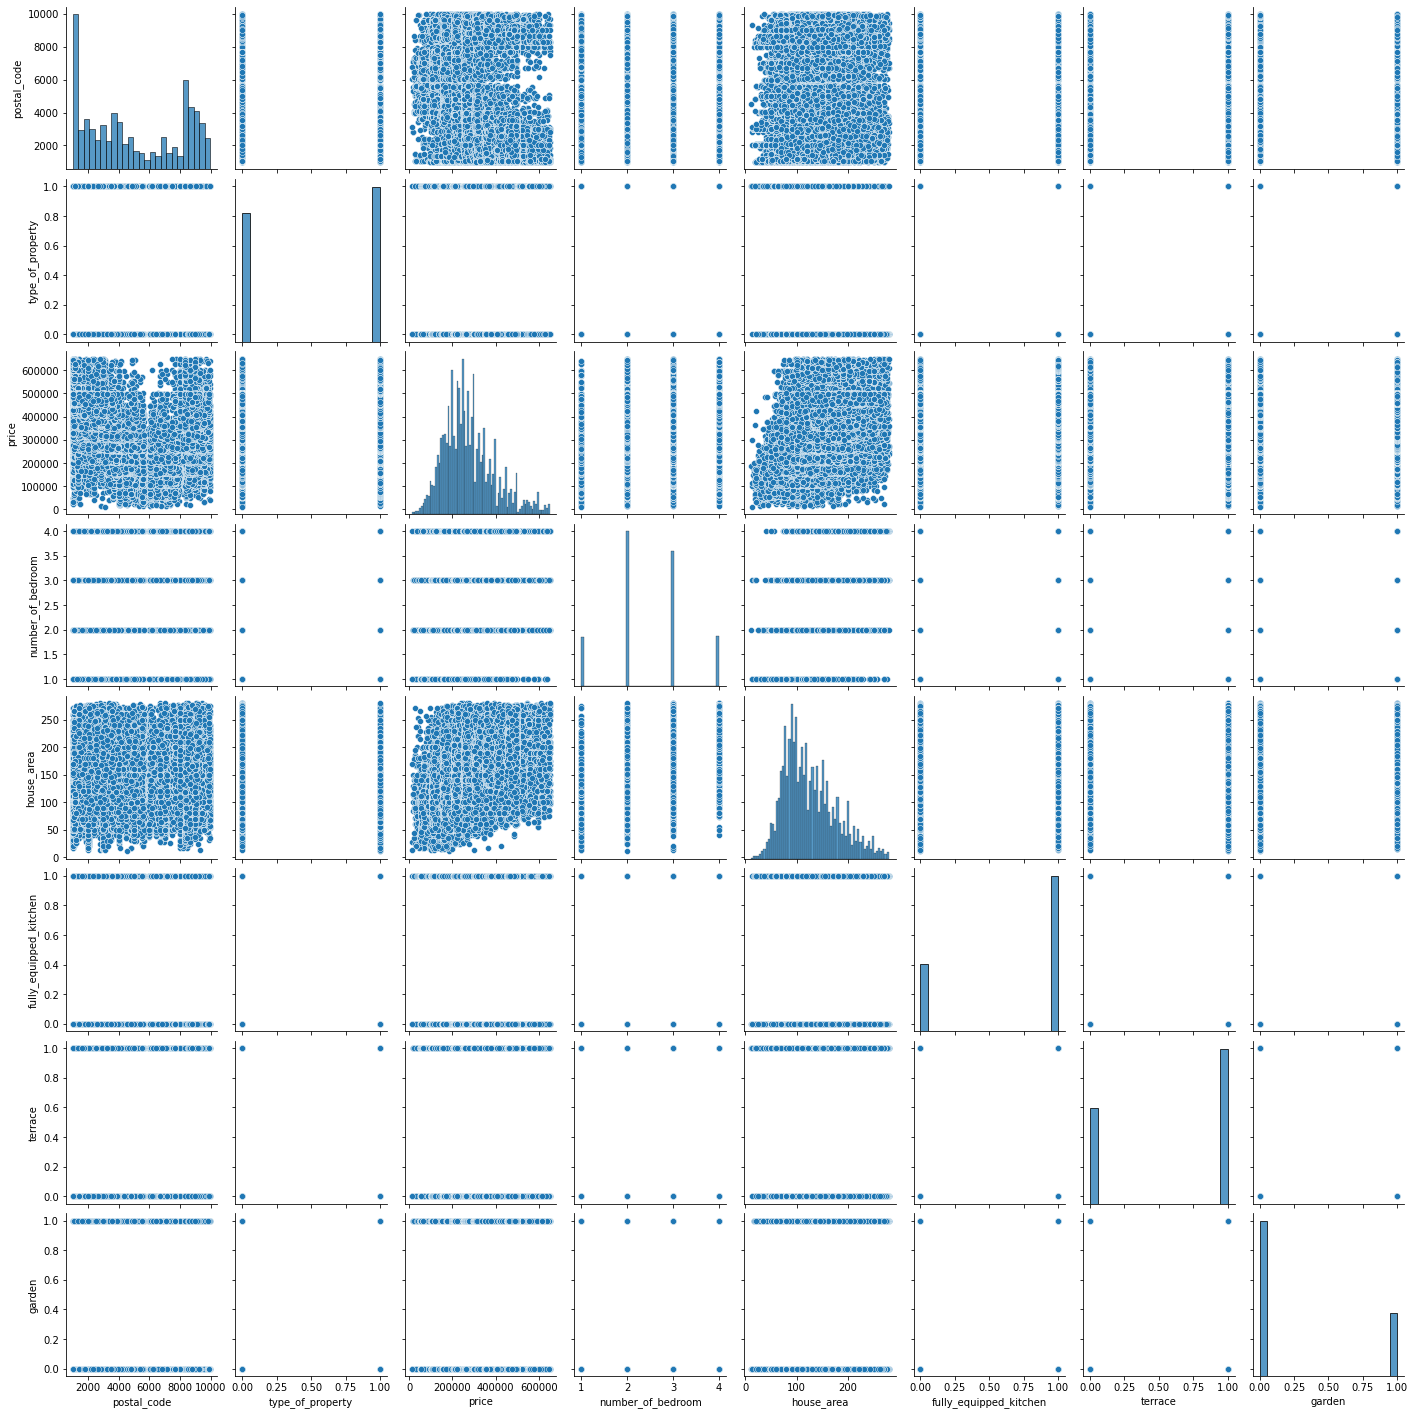

In [17]:
sns.pairplot(df_util)

In [18]:
df.dtypes

postal_code                 int64
type_of_property            int64
price                       int64
number_of_bedroom           int64
house_area                  int64
fully_equipped_kitchen      int64
terrace                     int64
garden                      int64
is_new                      int64
locality                   object
district                   object
province                   object
province_int              float64
region                     object
region_int                float64
district_int              float64
ratio_free_build          float64
dtype: object

In [19]:
house = df_util[df_util['type_of_property'] == 1]
apartment = df_util[df_util['type_of_property'] == 0]

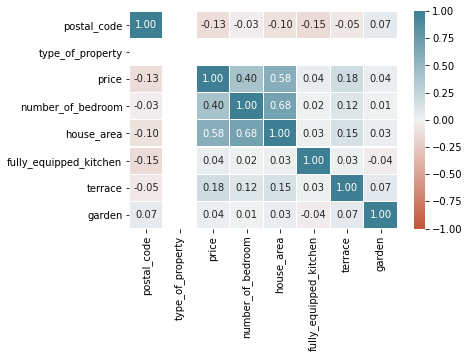

In [20]:
sns.heatmap(house.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

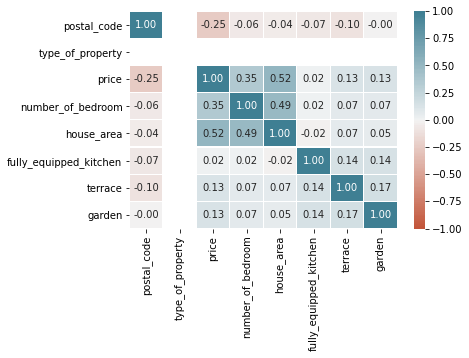

In [21]:
sns.heatmap(apartment.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [22]:
print(house['price'].mean())
print(apartment['price'].mean())

273882.574427053
277917.33578457875


## Export

In [23]:
df.to_csv('./dataset/immoCollect52-clean.csv')